# Kaggle 2018 Survey Analysis

## 1 - Overview and Business Understanding
This workbook contains an exploratory data analysis of the Kaggle 2018 Survey data (originally downloaded from https://www.kaggle.com/kaggle/kaggle-survey-2018/)

The data comes from almost 24,000 survey responses and cover a wide range of demographic data. The goal is to see if the dataset can give an insight into gender pay inequality among survey respondents.

The analysis aims at understanding the data set and answering the following questions:
 - Question 1: What are some of the demographics of the survey respondents?
 - Question 2: Are there any obvious discrepancies between Age, Pay, and Gender by Country?
 - Question 3: How does the pay gap look for individuals that consider themselves Data Scientists?
 
These 3 questions build on each other and will be explored using the relevant parts of the CRISP-DM framework (since no predictive modeling will be used, the biggest focus will be on Data Understanding, Data Preparation, and Evaluation)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pixiedust

# magic word for producing visualizations in notebook
%matplotlib inline

# magic for pixiedebugger

# magic for autocomplete
%config IPCompleter.greedy=True


Pixiedust database opened successfully


## 2 - Data Understanding
### Load data and initial overview of data set
The data set contains three files. For this analysis we will only use the file 'multipleChoiceResponses.csv' since it contains all demographic data and responses.

In [2]:
df = pd.read_csv('data\multipleChoiceResponses.csv', low_memory=False)

In [3]:
df.shape

(23860, 395)

In [4]:
# get a few sample rows from the top of the dataset
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [5]:
# evalulate object types for each feature and number of values on non-null values
df.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 395 columns):
Time from Start to Finish (seconds)    23860 non-null object
Q1                                     23860 non-null object
Q1_OTHER_TEXT                          23860 non-null object
Q2                                     23860 non-null object
Q3                                     23860 non-null object
Q4                                     23439 non-null object
Q5                                     22948 non-null object
Q6                                     22901 non-null object
Q6_OTHER_TEXT                          23860 non-null object
Q7                                     21686 non-null object
Q7_OTHER_TEXT                          23860 non-null object
Q8                                     21102 non-null object
Q9                                     20186 non-null object
Q10                                    20670 non-null object
Q11_Part_1                          

Since some of the columns are individual options from multiple choice questions, those features have high amounts of null values

## 3 - Data Preparation
Cleaning up the dataset, renaming columns, filtering, creating subsets, investigating and handling missing data, ...

In [6]:
# renaming columns of interest to more meaningful names
df.rename(index=str, columns={'Q1': 'Gender',
                              'Q2': 'Age_Group',
                              'Q3': 'Country',
                              'Q9': 'Pay_Group'}, inplace=True)

### row zero contains the questions - drop this from the dataframe and store it separately:

In [7]:
dfQuestions = df.iloc[0,:].copy()

In [8]:
df.drop(['0'], axis=0, inplace = True)

In [9]:
pd.set_option('max_colwidth',80)
pd.set_option("display.max_rows", 400)
dfQuestions

Time from Start to Finish (seconds)                                                              Duration (in seconds)
Gender                                                                          What is your gender? - Selected Choice
Q1_OTHER_TEXT                                                    What is your gender? - Prefer to self-describe - Text
Age_Group                                                                                  What is your age (# years)?
Country                                                                      In which country do you currently reside?
Q4                                     What is the highest level of formal education that you have attained or plan...
Q5                                                    Which best describes your undergraduate major? - Selected Choice
Q6                                     Select the title most similar to your current role (or most recent title if ...
Q6_OTHER_TEXT                          Select th

In [10]:
df.describe()

,Time from Start to Finish (seconds),Gender,Q1_OTHER_TEXT,Age_Group,Country,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
count,23859,23859,23859,23859,23859,23438,22947,22900,23859,21685,...,23859,1371,6478,2674,2104,3569,1059,2500,520,23859
unique,6522,4,67,12,58,7,13,21,863,19,...,169,1,1,1,1,1,1,1,1,409
top,101,Male,-1,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,Computers/Technology,...,-1,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without giving proper credit,Not enough incentives to share my work,I had never considered making my work easier for others to reproduce,None of these reasons apply to me,Other,-1
freq,31,19430,23780,6159,4716,10855,9430,5253,22537,5584,...,23689,1371,6478,2674,2104,3569,1059,2500,520,23428


### handling missing values:
no missing values in columns for country, age group, and gender so they can be used for initial exploration

### handling categorical features:
Age_Group and Pay_Group are categorical values of interest for this analysis.

Since the Age_Group and Pay_Group are strings, need to encode those as values to use simple scatter plots, regressions, and density plots.

We will encode each category by it's midpoint value. This is obviously and approximation but might still yield usefull overview of the data.

#### categorical value cleanup for feature Age_Group

In [12]:
df.Age_Group.value_counts().index

Index(['25-29', '22-24', '30-34', '18-21', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70-79', '80+'],
      dtype='object')

In [13]:
# encode the categorical age ranges with midpoint values (assumed 35-39 to mean 35<age<40 for midpoint of 37.5)
# using midpoint is not going to give the exact distribution of age but should help determine overall shape of pay distributions

df['Age'] = df.Age_Group.map({
    '18-21': 20.0,
    '22-24': 23.75,
    '25-29': 27.5,
    '30-34': 32.5,
    '35-39': 37.5,
    '40-44': 42.5,
    '45-49': 47.5,
    '50-54': 52.5,
    '55-59': 57.5,
    '60-69': 65,
    '70-79': 75,
    '80+': 80})

#### categorical value cleanup for feature AreYouDS
Since there is an implied order in the values, we can encode them as integers to open up this feature for inclusion into numerical analysis

In [14]:
# we have a question will help us zero in on the pay gap for data scientists:
dfQuestions.Q26

'Do you consider yourself to be a data scientist?'

In [15]:
df.Q26.value_counts()

Probably yes      4893
Definitely yes    4684
Maybe             4184
Probably not      3162
Definitely not    1557
Name: Q26, dtype: int64

In [16]:
# encode the categorical answer with numerical values

df['AreYouDS'] = df.Q26.map({
    'Definitely not': -2,
    'Probably not': -1,
    'Maybe': 0,
    'Probably yes': 1,
    'Definitely yes': 2})

#### categorical value cleanup for feature Pay_Group

In [17]:
# looking into compensation next:
df.Pay_Group.value_counts()

I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                                                      457
200-250,000                       

In [18]:
# encode the categorical pay ranges with midpoint values
# using midpoint is not going to give the exact distribution of pay but should help determine overall shape of pay distributions

df['Pay'] = df.Pay_Group.map({
    'I do not wish to disclose my approximate yearly compensation': np.NaN, #this introduces a lot of NaNs into the dataset
    '0-10,000': 5000,
    '10-20,000': 15000,
    '100-125,000': 112500,
    '20-30,000': 25000,
    '125-150,000': 137500,
    '150-200,000': 175000,
    '30-40,000': 35000,
    '90-100,000': 95000,
    '70-80,000': 75000,
    '80-90,000': 85000,
    '60-70,000': 65000,
    '50-60,000': 55000,
    '40-50,000': 45000,
    '200-250,000': 225000,
    '250-300,000': 275000,
    '300-400,000': 350000,
    '500,000+': 500000,
    '400-500,000': 450000})

## 4 - Modeling & 5 - Evaluation
Now that the initial data understanding and data preparation is complete, we can start analyzing the questions. We will not be using predictive modeling so this section will be used for analysis.

## Question 1: What are some of the demographics of the survey respondents?

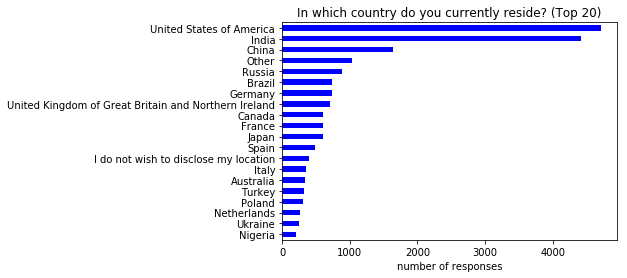

In [20]:
# bar plot of respondents by country

topx = 20 # use zero to show all or number. eg topx =10 for top 10

ax = df.Country.value_counts(ascending=True)[-topx:].plot(kind = 'barh', color = 'blue')
ax.set_title(dfQuestions.Country + ' (Top ' + str(topx) + ')')
ax.set_xlabel('number of responses')
plt.rcParams['figure.figsize'] = [16,8]
plt.savefig('images\img-top20-countries.jpg')
plt.show()

#### Most survey answers came from the US, India, and China - let's look into gender and age distributions in those countries:

In [21]:
df_top3_countries = df[(df.Country == 'United States of America') | (df.Country == 'India') | (df.Country == 'China')].copy()

### additional handling of NaNs

We now introduced several thousand NaNs into the data set (by mapping "I don't want to disclose my pay" to NaN
We will create a dataframe that removes the NaNs. The reason not to impute the values or try to predict them is that we want to ultimately overlay the pay from men and women. There are still enough data points left and they should be sufficient to produce the contour plots.

In [22]:
# our plan is to later work with contour plots so we plots we need to remove the NaNs
df_top_countries_noNaNs = df_top3_countries[['Age', 'AreYouDS', 'Pay', 'Country','Gender']].copy().dropna(axis=0, how='any')

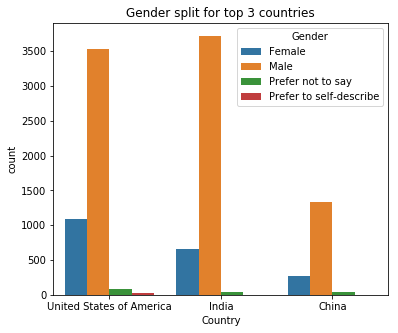

In [24]:
# how is the survey respondents split by gender by country?
sns.countplot(data = df_top3_countries, x = 'Country', hue= 'Gender')
plt.title('Gender split for top 3 countries')
plt.rcParams['figure.figsize'] = [6,5]
plt.savefig('images\img-top3-countries-gendersplit.jpg')
plt.show()

In [25]:
# counts by country
df_top3_countries.groupby(['Country'])['Gender'].count()

Country
China                       1644
India                       4417
United States of America    4716
Name: Gender, dtype: int64

In [26]:
# counts by country and gender
df_top3_countries.groupby(['Country'])['Gender'].value_counts()

Country                   Gender                 
China                     Male                       1337
                          Female                      267
                          Prefer not to say            38
                          Prefer to self-describe       2
India                     Male                       3719
                          Female                      657
                          Prefer not to say            37
                          Prefer to self-describe       4
United States of America  Male                       3530
                          Female                     1082
                          Prefer not to say            77
                          Prefer to self-describe      27
Name: Gender, dtype: int64

In [27]:
# percentages by country by gender
100.00 * df_top3_countries.groupby(['Country', 'Gender'])['Gender'].count() / df_top3_countries.groupby(['Country'])['Gender'].count()

Country                   Gender                 
China                     Female                     16.240876
                          Male                       81.326034
                          Prefer not to say           2.311436
                          Prefer to self-describe     0.121655
India                     Female                     14.874349
                          Male                       84.197419
                          Prefer not to say           0.837673
                          Prefer to self-describe     0.090559
United States of America  Female                     22.943172
                          Male                       74.851569
                          Prefer not to say           1.632740
                          Prefer to self-describe     0.572519
Name: Gender, dtype: float64

#### The US has a higher percentage of female respondents than China and India

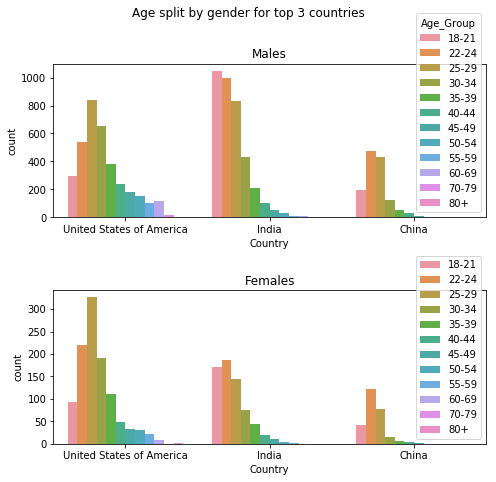

In [28]:
# sorting the age categories for the count plot
sorted_age_groups = sorted(df_top3_countries.Age_Group.value_counts().index)

fig, ax = plt.subplots(2, 1, figsize=(7,7))
fig.suptitle('Age split by gender for top 3 countries')

ax[0].set_title('Males')
sns.countplot(data = df_top3_countries[df_top3_countries.Gender == 'Male'], 
              x = 'Country',
              order = ['United States of America', 'India', 'China'],
              hue= 'Age_Group',
              hue_order = sorted_age_groups,
              ax = ax[0])


ax[1].set_title('Females')
sns.countplot(data = df_top3_countries[df_top3_countries.Gender == 'Female'], 
              x = 'Country',
              order = ['United States of America', 'India', 'China'],
              hue= 'Age_Group',
              hue_order = sorted_age_groups,
              ax = ax[1])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = [7,7]
plt.savefig('images\img-top3-countries-agesplit.jpg')
plt.show()

#### The survey participants from India are much younger than those from the US or China. Especially, young males are overrepresented.

## Question 2: Are there any obvious discrepancies between Age, Pay, and Gender by Country?

In [29]:
# average ages by country and gender
df_top3_countries \
    .loc[((df_top3_countries.Gender == 'Female') | (df_top3_countries.Gender == 'Male'))] \
    .pivot_table(values='Age', 
                 index=['Gender'],
                 columns=['Country'], 
                 aggfunc=[np.mean],
                 margins=True) \
    .style.background_gradient(axis='rows', subset=['mean'], cmap=sns.light_palette("green", as_cmap=True)) \
    .format("{:,.2f}")

C:\Users\Lindstaedt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


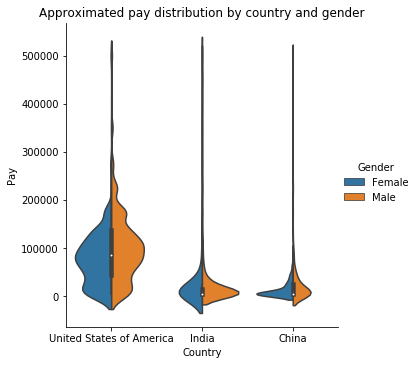

In [30]:
# compare payment grouping by gender and country
sns.catplot(data = (df_top3_countries.loc[((df_top3_countries.Gender == 'Female') | (df_top3_countries.Gender == 'Male')) # male or female
                                         & (df_top3_countries.Pay.notnull())]), # skip the NaNs
            x='Country', 
            hue='Gender', 
            y='Pay', 
            kind='violin',
            split=True)
plt.title('Approximated pay distribution by country and gender')
plt.savefig('images\img-top3-countries-incomedistribution.jpg')
plt.show()

Notice that the charts show values close to and below zero. This is an artifact of the plotting library trying to make a smooth chart of the distribution. The lowest values are 5000 in each chart.

In [31]:
# mean pay by gender and country
df_top3_countries.loc[((df_top3_countries.Gender == 'Female') | (df_top3_countries.Gender == 'Male'))] \
    .groupby(['Country', 'Gender'])['Pay'].mean()

Country                   Gender
China                     Female     13863.636364
                          Male       24360.304288
India                     Female     24824.074074
                          Male       22085.174276
United States of America  Female     78218.664850
                          Male      103466.564181
Name: Pay, dtype: float64

note that removing the extremely high salaries would bring down the average - but these are reportedly real salaries so they can't just be removed as outliers

#### there appears to be a difference in pay ranges and distributions between men and women in all three countries

maybe this is due to different levels of experience?

## Question 3 - how does the pay gap look for individuals that consider themselves Data Scientists?

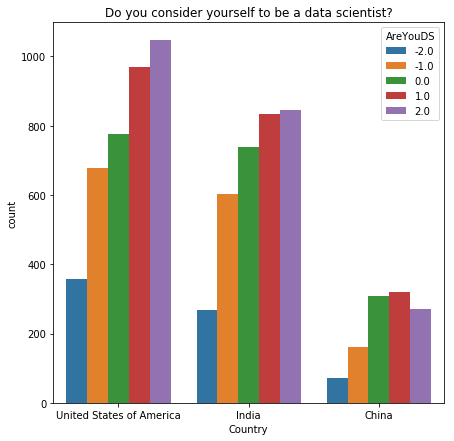

In [32]:
# we will use the self categorization in the question "are you a data scientist?"
sns.countplot(data = df_top3_countries, x = 'Country', hue= 'AreYouDS')
plt.title(dfQuestions.Q26)
plt.rcParams['figure.figsize'] = [4,5]
plt.show()

Is there a difference between men and women?

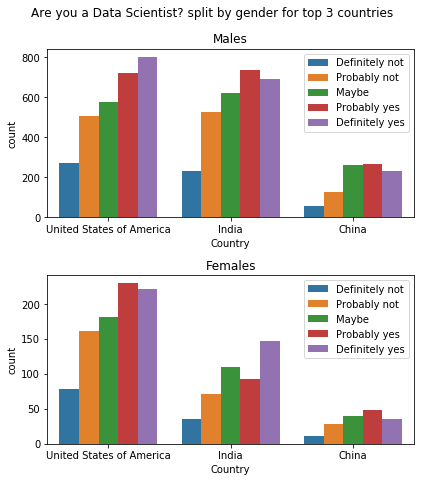

In [34]:
# sorting the categories for the count plot
sorted_DS_groups = sorted(df_top3_countries.AreYouDS.value_counts().index)

fig, ax = plt.subplots(2, 1)
fig.suptitle('Are you a Data Scientist? split by gender for top 3 countries')

ax[0].set_title('Males')
sns.countplot(data = df_top3_countries[df_top3_countries.Gender == 'Male'], 
              x = 'Country',
              order = ['United States of America', 'India', 'China'],
              hue= 'AreYouDS',
              hue_order = sorted_DS_groups,
              ax = ax[0])
ax[0].legend(['Definitely not', 'Probably not', 'Maybe', 'Probably yes', 'Definitely yes'])

ax[1].set_title('Females')
sns.countplot(data = df_top3_countries[df_top3_countries.Gender == 'Female'], 
              x = 'Country',
              order = ['United States of America', 'India', 'China'],
              hue= 'AreYouDS',
              hue_order = sorted_DS_groups,
              ax = ax[1])
ax[1].legend(['Definitely not', 'Probably not', 'Maybe', 'Probably yes', 'Definitely yes'])

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.rcParams['figure.figsize'] = [6,7]
plt.savefig('images\img-top3-countries-dataScientist-split.jpg')
plt.show()

Not enough survey responses for Chinese females in most "Are you a Data Scientist" buckets to comfortably use the mean (since we also used midpoints for the salary buckets)

In [35]:
# pay by country, gender, and how survey respondents ranked themselves on the question
# "Do you consider yourself a data scientist?"

df_top3_countries \
    .loc[((df_top3_countries.Gender == 'Female') | (df_top3_countries.Gender == 'Male'))] \
    .pivot_table(values='Pay', 
                 index=['AreYouDS', 'Q26'],
                 columns=['Country','Gender'], 
                 aggfunc=['count', np.mean],
                 margins=True) \
    .style.background_gradient(axis='rows', subset=['mean'], cmap=sns.light_palette("green", as_cmap=True)) \
    .format("{:,.0f}")

In [36]:
# checking counts by age and AreYouDS and country and gender to get a sense for amount of respondents in each cell
# for "probably" and "definitily" DS (ie 1 or 2):

df_top_countries_noNaNs \
    .loc[((df_top_countries_noNaNs.Gender == 'Female') | (df_top_countries_noNaNs.Gender == 'Male'))
           & (df_top_countries_noNaNs.Country != 'China')
           & (df_top_countries_noNaNs.AreYouDS >= 1)] \
    .pivot_table(values='Pay', 
                 index=['AreYouDS', 'Age'],
                 columns=['Country','Gender'], 
                 aggfunc=['count', np.mean],
                 margins=True) \
    .style.background_gradient(axis='rows', subset=['mean'], cmap=sns.light_palette("green", as_cmap=True)) \
    .format("{:,.0f}")

C:\Users\Lindstaedt\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [37]:
# checking counts by age and AreYouDS and country and gender to get a sense for amount of respondents in each cell
# for "definitily" DS only (AreYouDS=2):

df_top_countries_noNaNs \
    .loc[((df_top_countries_noNaNs.Gender == 'Female') | (df_top_countries_noNaNs.Gender == 'Male'))
           & (df_top_countries_noNaNs.Country != 'China')
           & (df_top_countries_noNaNs.AreYouDS == 2)] \
    .pivot_table(values='Pay', 
                 index=['AreYouDS', 'Age'],
                 columns=['Country','Gender'], 
                 aggfunc=['count', np.mean],
                 margins=True) \
    .style.background_gradient(axis='rows', subset=['mean'], cmap=sns.light_palette("green", as_cmap=True)) \
    .format("{:,.0f}")

C:\Users\Lindstaedt\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lindstaedt\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


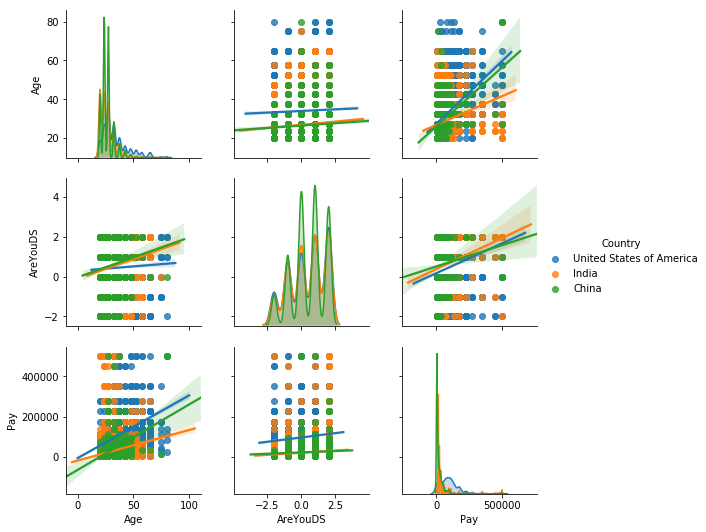

In [38]:
# exploring the variables via a pairplot to see if anything stands out - split by country
sns.pairplot((df_top3_countries[['Age', 'AreYouDS', 'Pay', 'Country']]), hue='Country', kind='reg')
plt.show()

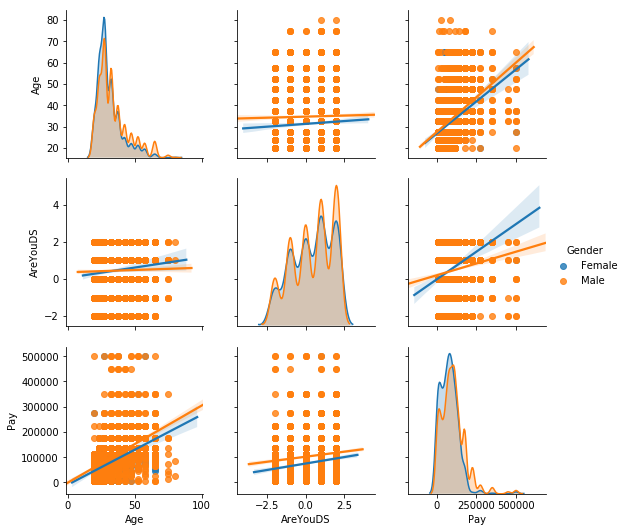

In [39]:
# exploring the variables via a pairplot to see if anything stands out - split by gender for US only
sns.pairplot(df_top3_countries.loc[((df_top3_countries.Gender == 'Female') | (df_top3_countries.Gender == 'Male'))
                                   & (df_top3_countries.Country == 'United States of America'),
                                   ['Age', 'AreYouDS', 'Pay', 'Country', 'Gender']],
             hue='Gender', kind='reg')
plt.show()

#### The age and pay and AreYouDS values were all encoded as midpoints of their brackets. So the charts plot multiple dots on top of each other in the scatter plots. This does not help understanding teh distribution/density. Let's try getting a better view by using contour plots:

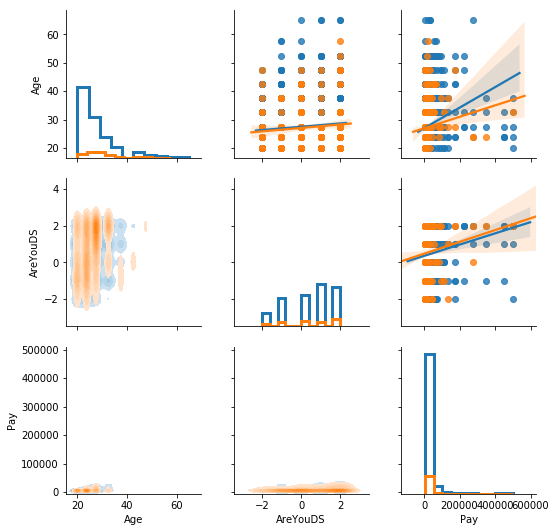

In [40]:
# adding contour plots into the lower left half - looking at only India
df_for_plot = df_top_countries_noNaNs.loc[((df_top_countries_noNaNs.Gender == 'Female') | (df_top_countries_noNaNs.Gender == 'Male'))
                                   & (df_top_countries_noNaNs.Country == 'India'),
                                ['Age', 'AreYouDS', 'Pay', 'Country', 'Gender']]

g = sns.PairGrid(df_for_plot, hue='Gender')
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_upper(sns.regplot)
g = g.map_lower(sns.kdeplot, shade=True, n_levels=10, shade_lowest=False)
plt.show()

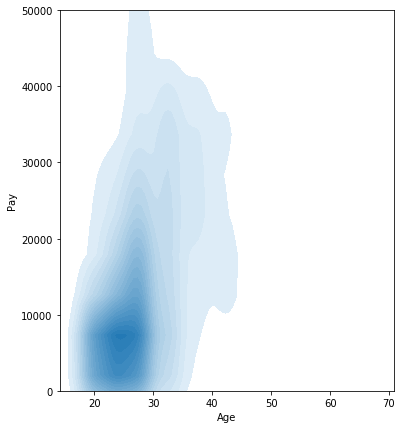

In [41]:
# contour plots seem to look useful - let's zoom into one for testing
df_for_plot = df_top_countries_noNaNs.loc[((df_top_countries_noNaNs.Gender == 'Female') | (df_top_countries_noNaNs.Gender == 'Male'))
                                           & (df_top_countries_noNaNs.Country == 'India')
                                           & (df_top_countries_noNaNs.AreYouDS == 2),
                                ['Age', 'AreYouDS', 'Pay', 'Country', 'Gender']]

sns.kdeplot(df_for_plot[('Age')], df_for_plot[('Pay')], shade=True, n_levels=30, shade_lowest=False)
plt.ylim(0,50000)
plt.show()

overlaying two contour plots (one with lines and one filled) would be a way to overlay two distributions...

In [42]:
def kde_plotter(df, country, min_level_AreYouDS, addl_title, ax):
    '''
    plots an overlay of two contour plots - blue lines for women and orange contours for men
    
    inputs:
        df - dataframe with data
        country - country name
        min_level_AreYouDS - minimum level for Are you Data Scientist question (-2 = no, +2 = definitely yes)
        addl_title - extra text that will be shown in the title
        ax - axis object for plot
    '''
    
    df_for_plot_male = df.loc[(df.Gender == 'Male')
                               & (df.Country == country)
                               & (df.AreYouDS >= min_level_AreYouDS),
                                    ['Age', 'Pay']]

    df_for_plot_female = df.loc[(df.Gender == 'Female')
                               & (df.Country == country)
                               & (df.AreYouDS >= min_level_AreYouDS),
                                     ['Age', 'Pay']]

    # outline plot for women in blue
    sns.kdeplot(df_for_plot_female[('Age')], df_for_plot_female[('Pay')],
                shade=False, n_levels=15, cmap='Blues', ax=ax)
    
    # filled contours in orange for men
    sns.kdeplot(df_for_plot_male[('Age')], df_for_plot_male[('Pay')],
                shade=True, n_levels=15, shade_lowest=False, cmap='Oranges', ax=ax)
    ax.set_title(country + ' - ' + addl_title)

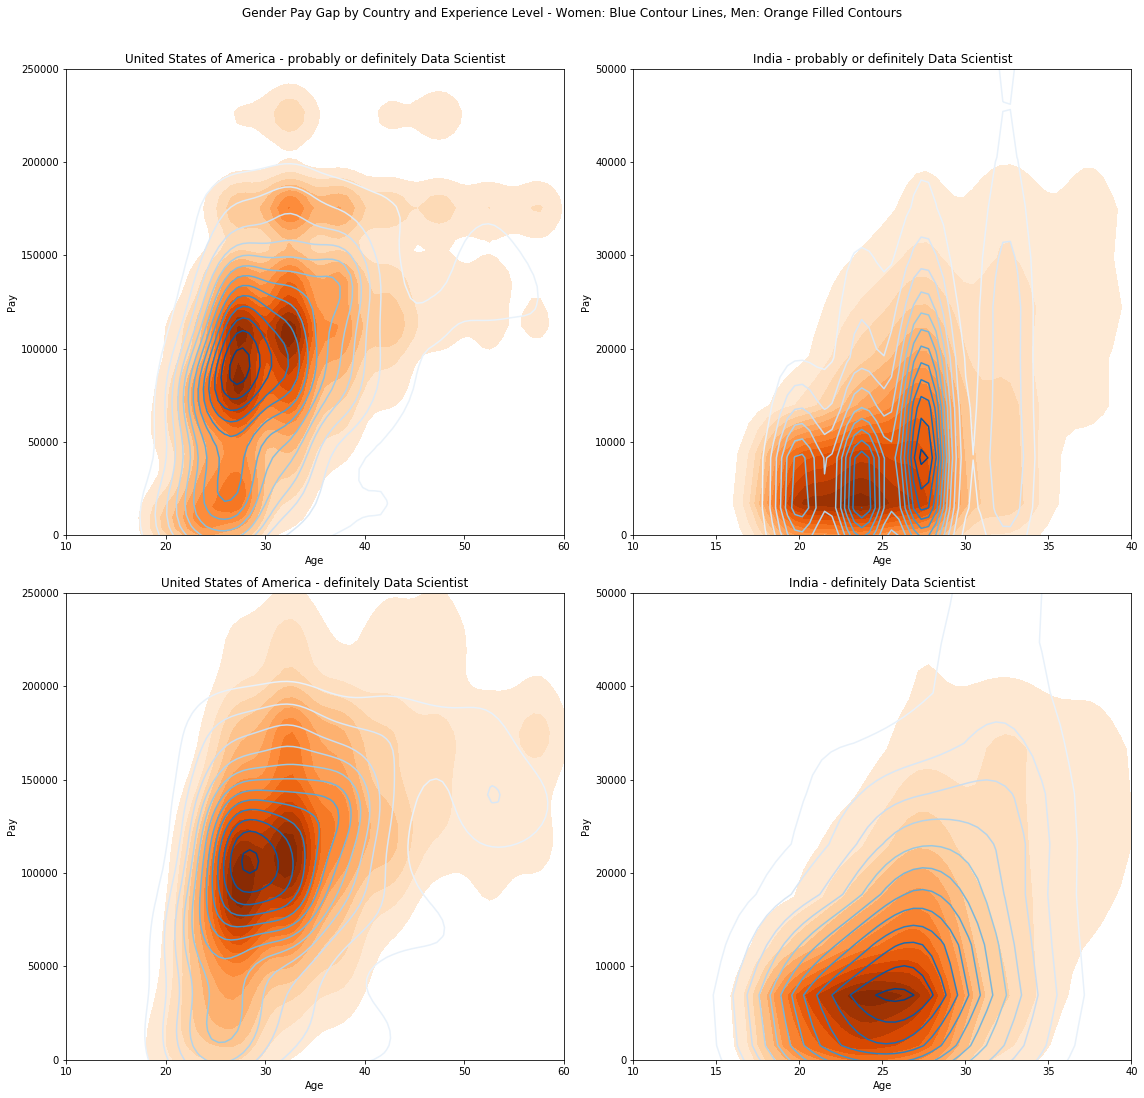

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
fig.suptitle('Gender Pay Gap by Country and Experience Level - Women: Blue Contour Lines, Men: Orange Filled Contours')

kde_plotter(df_top_countries_noNaNs, 'United States of America', 1, 'probably or definitely Data Scientist', ax1)    
ax1.set_xlim(10,60)
ax1.set_ylim(0,250000)

kde_plotter(df_top_countries_noNaNs, 'India', 1, 'probably or definitely Data Scientist', ax2)    
ax2.set_xlim(10,40)
ax2.set_ylim(0,50000)

kde_plotter(df_top_countries_noNaNs, 'United States of America', 2, 'definitely Data Scientist', ax3)    
ax3.set_xlim(10,60)
ax3.set_ylim(0,250000)

kde_plotter(df_top_countries_noNaNs, 'India', 2, 'definitely Data Scientist', ax4)
ax4.set_xlim(10,40)
ax4.set_ylim(0,50000)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images\img-USandIndia-dataScientist-pay-by-age-and-level-split.jpg')
plt.show()

### Some people replying may be over or under-confident when they picked "probably" as being a data scientist. But let's believe the confident ones that said "definitely" - ie the bottom two charts.

The female data scientists that responded to the Kaggle survey that are in their late 20s from the US appear to earn a bit more than their male counterparts (the blue peak is above the left orange peak). But for older males the pay seems to be higher than for females (the 30–35 age group has a much higher salary range expanding more into the 150k+ USD area).

The pay gap between male and female self-categorized data scientists from India appears to be minimal (the overall shape of the distributions is fairly similar). Most male Indian data scientist seem to be a few years younger than females in the same pay range (the peak for men and women is 2–3 years apart).

## 6 - Deployment
No models need deployment into production

## --- Please see the README.md to find the link to a blog post about this analysis ---